### NEWS ARTICLE SORTING ###

###  Life cycle of Machine learning Project
##### *Understanding the Problem Statement
##### *Data Collection
##### *Data Checks to perform
##### *Exploratory data analysis
##### *Data Pre-Processing
##### *Model Training
##### *Choose best model

#### 1.  PROBLEM STATEMENT

The goal of this project is to classify news articles into different categories such as business, tech, sports, politics, and entertainment. The aim is to build a text classification model that can automatically sort articles into these categories based on their content.



### 2.DATA COLLECTION

#### Data Source : https://www.kaggle.com/datasets/moazeldsokyx/bbc-news

#### 2.1 Import Data and Required Packages

In [23]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Import the CSV Data as Pandas DataFrame

In [25]:
# Load the data
df = pd.read_csv('BBC_News_processed.csv')

##### Show Top 5 Records

In [26]:
df.head()

,Unnamed: 0,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


##### Shape of the dataset

In [27]:
df.shape

(1490, 7)

#### 2.2 Dataset information

###### ArticleId: A unique identifier for each article.
###### Text: The full text of the article.
###### Category: The category to which the article belongs (e.g., business).
###### News_length: The length of the news article.
###### Text_parsed: A processed or cleaned version of the Text.
###### Category_target: A numerical representation of the category (e.g., 0 for business).

### 3. Data Checks to perform

##### Check Missing values
##### Check Duplicates
##### Check data type
##### Check the number of unique values of each column
##### Check statistics of data set
##### Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [28]:
df.isna().sum()


,0
Unnamed: 0,0
ArticleId,0
Text,0
Category,0
News_length,0
Text_parsed,0
Category_target,0


There are no missing values in the data set

#### 3.2 Check Duplicates

In [29]:
df.duplicated().sum()

0

There are no duplicates values in the data set

#### 3.3 Dropping Unwanted column

In [30]:
df = df.drop(["Unnamed: 0"],axis=1)

#### 3.4 Check data types

In [31]:
df.dtypes

,0
ArticleId,int64
Text,object
Category,object
News_length,int64
Text_parsed,object
Category_target,int64


In [33]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ArticleId        1490 non-null   int64 
 1   Text             1490 non-null   object
 2   Category         1490 non-null   object
 3   News_length      1490 non-null   int64 
 4   Text_parsed      1490 non-null   object
 5   Category_target  1490 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 70.0+ KB


#### 3.5 Checking the number of unique values of each column

In [34]:
df.nunique()

,0
ArticleId,1490
Text,1440
Category,5
News_length,1172
Text_parsed,1438
Category_target,5


#### 3.6 Check statistics of data set

In [35]:
print("\nDataset Description:")
df.describe()



Dataset Description:


,ArticleId,News_length,Category_target
count,1490.000000,1490.000000,1490.000000
mean,1119.696644,2233.461745,1.948322
std,641.826283,1205.153358,1.420142
min,2.000000,501.000000,0.000000
25%,565.250000,1453.000000,1.000000
50%,1112.500000,1961.000000,2.000000
75%,1680.750000,2751.250000,3.000000
max,2224.000000,18387.000000,4.000000


#### 4.Data Preprocessing

In [36]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers
    tokens = word_tokenize(text)         # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming (or use lemmatizer)
    text = ' '.join(tokens)  # Rejoin tokens
    return text

In [37]:
# Apply preprocessing
df['ProcessedText'] = df['Text'].apply(preprocess_text)

### 5.Visualization

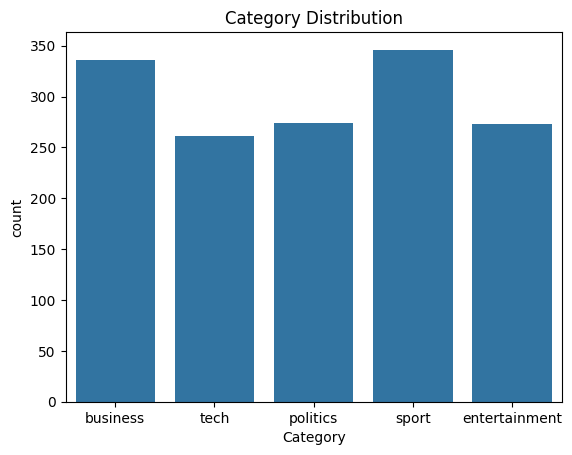

In [38]:
# Plot category distribution
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.show()


In [39]:
# Save preprocessed data for model training
df.to_csv('preprocessed_bbc_news.csv', index=False)

In [40]:
# Print some processed text examples
print("\nProcessed Text Samples:")
df[['Text', 'ProcessedText']].head()


Processed Text Samples:


,Text,ProcessedText
0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launch defenc lawyer defend fo...
1,german business confidence slides german busin...,german busi confid slide german busi confid fe...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indic econom gloom citizen major nati...
3,lifestyle governs mobile choice faster bett...,lifestyl govern mobil choic faster better funk...
4,enron bosses in $168m payout eighteen former e...,enron boss payout eighteen former enron direct...


In [20]:
# Word cloud visualization of the processed text (optional)
from wordcloud import WordCloud

In [41]:
text = ' '.join(df['ProcessedText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


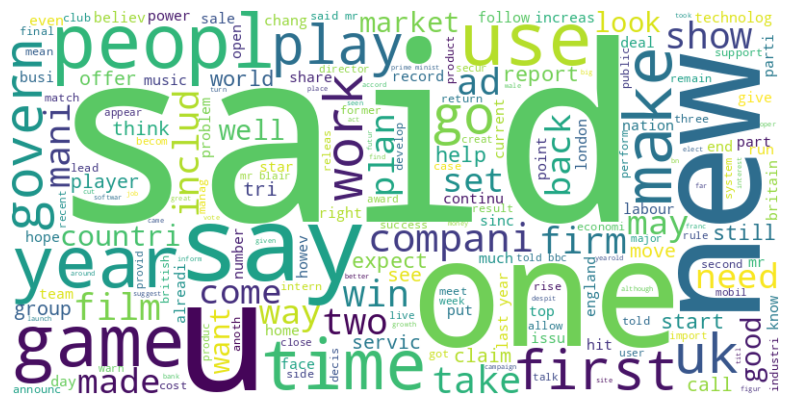

In [42]:
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()